In [189]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [190]:
data=pd.read_csv('C:/Users/kmist/Desktop/Sem 10/Predictive Modelling/M2/CleanedCategoricalTraining.csv')

In [191]:
df=pd.read_csv('C:/Users/kmist/Desktop/Sem 10/Predictive Modelling/M2/CleanedNumericTrain.csv')

In [192]:
df.head(5)

,Unnamed: 0,budget,popularity,revenue,runtime
0,0,3.000000e+07,21.946943,3.735540e+08,81.0
1,1,2.181861e+07,2.561161,6.668234e+07,97.0
2,2,1.200000e+07,8.681325,2.740000e+07,100.0
3,3,2.181861e+07,1.100915,6.668234e+07,108.0
4,4,3.000000e+07,14.404764,2.541349e+08,89.0


In [193]:
#Data for Analysis
X = data[['Adult','Not Adult','NotInCollection','InCollection','In Production','Planned','Post Production','Released','Rumored','Unknown']]

In [194]:
X=pd.concat([X,df['budget'],df['popularity'],df['revenue'],df['runtime']],axis=1)

In [195]:
X.head(5)

,Adult,Not Adult,NotInCollection,InCollection,In Production,Planned,Post Production,Released,Rumored,Unknown,budget,popularity,revenue,runtime
0,1,0,0,1,0,0,0,1,0,0,3.000000e+07,21.946943,3.735540e+08,81.0
1,1,0,1,0,0,0,0,1,0,0,2.181861e+07,2.561161,6.668234e+07,97.0
2,1,0,1,0,0,0,0,1,0,0,1.200000e+07,8.681325,2.740000e+07,100.0
3,1,0,1,0,0,0,0,1,0,0,2.181861e+07,1.100915,6.668234e+07,108.0
4,1,0,0,1,0,0,0,1,0,0,3.000000e+07,14.404764,2.541349e+08,89.0


In [196]:
w=pd.read_excel('C:/Users/kmist/Desktop/Sem 10/Predictive Modelling/M2/PMimportTrain.xlsx')
Y=pd.DataFrame(w['Target Success'])

In [197]:
Y.head(5)

,Target Success
0,1
1,0
2,0
3,0
4,0


In [198]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\kmist\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kmist\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kmist\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [199]:
X_train

array([[ 1.28131438e-02, -1.28131438e-02,  3.31953569e-01, ...,
        -5.26412260e-01,  1.85809859e-03, -3.90911968e-01],
       [ 1.28131438e-02, -1.28131438e-02, -3.01246949e+00, ...,
         3.24255722e-01,  1.85809859e-03, -2.62742302e-01],
       [ 1.28131438e-02, -1.28131438e-02,  3.31953569e-01, ...,
        -4.62900743e-01,  1.85809859e-03, -1.34572636e-01],
       ...,
       [ 1.28131438e-02, -1.28131438e-02,  3.31953569e-01, ...,
        -4.16700984e-01,  1.85809859e-03,  2.81978778e-01],
       [ 1.28131438e-02, -1.28131438e-02,  3.31953569e-01, ...,
        -1.15727577e-01,  1.85809859e-03, -4.22954384e-01],
       [ 1.28131438e-02, -1.28131438e-02,  3.31953569e-01, ...,
        -4.82584811e-01,  1.85809859e-03, -1.38422688e+00]])

In [200]:
#Model and Training
LogReg = LogisticRegression(random_state=0, solver='lbfgs')
LogReg.fit(X_train,Y_train)


C:\Users\kmist\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
LogReg.score(X_test,Y_test)

0.7882927912917916

In [202]:
LogReg.predict_proba(X_test)

array([[0.79170566, 0.20829434],
       [0.6980961 , 0.3019039 ],
       [0.85540769, 0.14459231],
       ...,
       [0.84620158, 0.15379842],
       [0.8307446 , 0.1692554 ],
       [0.78268981, 0.21731019]])

In [203]:
y_pred=LogReg.predict(X_test)

In [204]:
conf_mat=confusion_matrix(Y_test,y_pred)

In [205]:
conf_mat

array([[7074,   16],
       [1890,   23]], dtype=int64)

In [206]:
acc=accuracy_score(Y_test,y_pred)
acc

0.7882927912917916

In [207]:
precision=precision_score(Y_test,y_pred)
precision

0.5897435897435898

In [208]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

0.46011651644796275

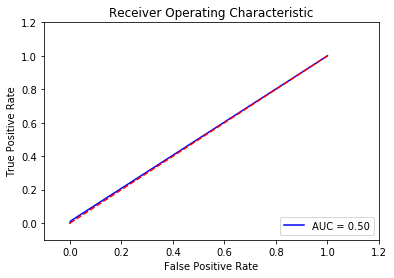

In [209]:
#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [219]:
data1=pd.read_csv('C:/Users/kmist/Desktop/Sem 10/Predictive Modelling/M2/CleanedCategoricalTest.csv')
data1.head(5)

,Unnamed: 0,ID,Adult,Not Adult,NotInCollection,InCollection,English /Non English,ExYear,ExMonth,ExDay,Canceled,In Production,Planned,Post Production,Released,Rumored,Unknown
0,0,3,1,0,1,0,1,1995,11,21,0,0,0,0,1,0,0
1,1,6,1,0,1,0,1,1995,12,15,0,0,0,0,1,0,0
2,2,10,1,0,1,0,1,1995,5,20,0,0,0,0,1,0,0
3,3,14,1,0,1,0,1,1995,12,22,0,0,0,0,1,0,0
4,4,16,1,0,1,0,1,1995,11,22,0,0,0,0,1,0,0


In [220]:
df1=pd.read_csv('C:/Users/kmist/Desktop/Sem 10/Predictive Modelling/M2/CleanedNumericTest.csv')
df1.head(5)

,Unnamed: 0,budget,popularity,revenue,runtime
0,0,6.000000e+07,7.337906,3.543111e+07,103.0
1,1,6.000000e+07,17.924927,1.874368e+08,170.0
2,2,2.128248e+07,0.001346,7.196067e+07,110.0
3,3,4.400000e+07,5.092000,1.368176e+07,192.0
4,4,5.200000e+07,10.137389,1.161124e+08,178.0


In [222]:
#Data for Analysis
X1 = data1[['Adult','Not Adult','NotInCollection','InCollection','In Production','Planned','Post Production','Released','Rumored','Unknown']]

In [223]:
X1=pd.concat([X1,df['budget'],df['popularity'],df['revenue'],df['runtime']],axis=1)

In [224]:
X1.head(5)

,Adult,Not Adult,NotInCollection,InCollection,In Production,Planned,Post Production,Released,Rumored,Unknown,budget,popularity,revenue,runtime
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.000000e+07,21.946943,3.735540e+08,81.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.181861e+07,2.561161,6.668234e+07,97.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.200000e+07,8.681325,2.740000e+07,100.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.181861e+07,1.100915,6.668234e+07,108.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.000000e+07,14.404764,2.541349e+08,89.0


In [225]:

scaler = StandardScaler()
X1 =scaler.fit_transform(X1)

In [226]:
X1

array([[ 1.65844093e-02, -1.65844093e-02,  3.30638202e-01, ...,
         3.74975891e+00,  5.43446848e+00, -5.03449246e-01],
       [ 1.65844093e-02, -1.65844093e-02,  3.30638202e-01, ...,
        -5.98512809e-02,  2.63888439e-16, -8.54695650e-03],
       [ 1.65844093e-02, -1.65844093e-02,  3.30638202e-01, ...,
         1.14285693e+00, -6.95660989e-01,  8.42472228e-02],
       ...,
       [            nan,             nan,             nan, ...,
        -5.48976851e-01,  2.63888439e-16, -2.55998101e-01],
       [            nan,             nan,             nan, ...,
        -4.59270193e-01,  2.63888439e-16, -8.54695650e-03],
       [            nan,             nan,             nan, ...,
        -3.48477009e-01,  2.63888439e-16, -8.54695650e-03]])

In [229]:
X1=pd.DataFrame(X1)
X1=X1.dropna(axis=0, how='any')

In [230]:
y_test_pred=LogReg.predict_proba(X1)

In [232]:
y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred.head(5)

,0,1
0,0.470910,0.529090
1,0.787499,0.212501
2,0.756426,0.243574
3,0.785762,0.214238
4,0.615529,0.384471


In [234]:
y_test_pred.to_csv('Predictions1.csv',index=False)

In [236]:
y_testp=LogReg.predict(X1)

In [238]:
y_testp=pd.DataFrame(y_testp)
y_testp.head(5)

,0
0,1
1,0
2,0
3,0
4,0


In [246]:
y_testp.to_csv('Submission.csv',index=True)